# Multi Class Classification

Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). Let’s try this with the SGDClassifier:

In [7]:
# Load the dataset
from keras.datasets import mnist

(X_train,y_train),(X_test,y_test)=mnist.load_data()

# Reshape into 1d vector
X_train=X_train.reshape(X_train.shape[0],28*28)
X_test=X_test.reshape(X_test.shape[0],28*28)

In [9]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier()
sgd_clf.fit(X_train,y_train)
predict=sgd_clf.predict(X_test[100:101])
print("Testing model")
print("Predicted label: ",predict)
print("Original Label: ",y_test[100:101])

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Testing model
Predicted label:  [6]
Original Label:  [6]


That was easy! This code trains the SGDClassifier on the training set using the original target classes from 0 to 9 (y_train), instead of the 5-versus-all target classes (y_train_5). Then it makes a prediction (a correct one in this case). Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score. 

To see that this is indeed the case, you can call the decision_function() method. Instead of returning just one score per instance, it now returns 10 scores, one per class:


In [10]:
digit_score=sgd_clf.decision_function(X_test[100:101])
digit_score

array([[-410829.37884789, -274276.81879166, -169173.0263526 ,
        -384012.14403945, -359321.80747163, -683522.68729795,
         186872.45771807, -451418.37506688, -289875.32782809,
        -239631.64877596]])

In [11]:
# The highest score is indeed the one corresponding to class 6:
import numpy as np
print(np.argmax(digit_score))

6


In [14]:
sgd_clf.classes_[6]

6

# Warning

When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In this case, the index of each class in the classes_ array conveniently matches the class itself (e.g., the class at index 5 happens to be class 5), but in general you won’t be so lucky.

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance and pass a binary classifier to its constructor. For example, this code creates a multiclass classifier using the OvO strategy, based on a SGDClassifier: 

In [15]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict(X_test[100:101])

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([6], dtype=uint8)

In [16]:
len(ovo_clf.estimators_)

45

Training a RandomForestClassifier is just as easy:

In [17]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier()
forest_clf.fit(X_train,y_train)

forest_clf.predict(X_test[100:101])

array([6], dtype=uint8)

This time Scikit-Learn did not have to run OvA or OvO because Random Forest classifiers can directly classify instances into multiple classes. You can call predict_proba() to get the list of probabilities that the classifier assigned to each instance for each class:


In [18]:
forest_clf.predict_proba(X_test[100:101])

array([[0. , 0. , 0.1, 0. , 0. , 0. , 0.9, 0. , 0. , 0. ]])

You can see that the classifier is fairly confident about its prediction: the 0.9 at the 6th index in the array means that the model estimates an 90% probability that the image represents a 6. It also thinks that the image could instead be a 2 (10% chance).

Now of course you want to evaluate these classifiers. As usual, you want to use cross-validation. Let’s evaluate the SGDClassifier’s accuracy using the cross_val_score() function: 

In [31]:
from sklearn.cross_validation import cross_val_score

cross_validation_score=cross_val_score(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')
cross_validation_score

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.8659768 , 0.87064353, 0.85022753])

It gets over 85% on all test folds. If you used a random classifier, you would get 10% accuracy, so this is not such a bad score, but you can still do much better. For example, simply scaling the inputs increases accuracy above 90% (as discussed in 1. Classification):

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64)) 
cross_val_score(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([0.90586883, 0.9080954 , 0.91218683])

# Error Analysis

Of course, if this were a real project, you would follow the steps in your Machine Learning project checklist, exploring data preparation options, trying out multiple models, shortlisting the best ones and fine-tuning their hyperparameters using GridSearchCV, and automating as much as possible, as you did in the previous chapter. Here, we will assume that you have found a promising model and you want to find ways to improve it. One way to do this is to analyze the types of errors it makes. 

First, you can look at the confusion matrix. You need to make predictions using the cross_val_predict() function, then call the confusion_matrix() function, just like you did earlier: 

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx

c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
c:\users\deepblue\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3

array([[5731,    2,   24,    8,   11,   48,   46,    8,   41,    4],
       [   1, 6467,   38,   30,    6,   42,    6,    9,  133,   10],
       [  52,   36, 5305,  119,   82,   26,   85,   61,  177,   15],
       [  52,   38,  143, 5334,    3,  231,   36,   61,  142,   91],
       [  17,   25,   43,    8, 5374,   12,   53,   32,   88,  190],
       [  76,   35,   38,  198,   77, 4612,  104,   22,  165,   94],
       [  38,   25,   42,    2,   41,   95, 5628,    2,   45,    0],
       [  29,   23,   73,   24,   56,   12,    4, 5769,   18,  257],
       [  51,  152,   68,  159,   14,  163,   54,   22, 5029,  139],
       [  44,   33,   31,   86,  179,   35,    3,  197,   77, 5264]],
      dtype=int64)

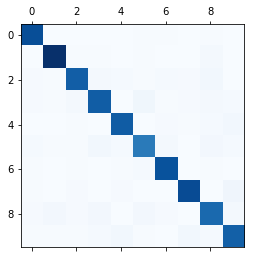

In [41]:
# Better visualization
from matplotlib import pyplot as plt
plt.matshow(conf_mx,cmap=plt.cm.Blues)

This confusion matrix looks fairly good, since most images are on the main diagonal, which means that they were classified correctly. The 1 look slightly darker than the other digits, which could mean that there are fewer images of 1 in the dataset or that the classifier does not perform as well on 1 as on other digits. In fact, you can verify that both are the case. 

Let’s focus the plot on the errors. First, you need to divide each value in the confusion matrix by the number of images in the corresponding class, so you can compare error rates instead of absolute number of errors (which would make abundant classes look unfairly bad):

In [45]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

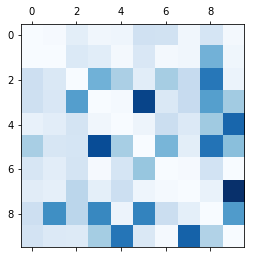

In [46]:
# Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.Blues)

Now you can clearly see the kinds of errors the classifier makes. Remember that rows represent actual classes, while columns represent predicted classes. The columns for classes 8 and 9 are quite bright, which tells you that many images get misclassified as 8s or 9s. Similarly, the rows for classes 8 and 9 are also quite bright, telling you that 8s and 9s are often confused with other digits. Conversely, some rows are pretty dark, such as row 1: this means that most 1s are classified correctly (a few are confused with 8s, but that’s about it). Notice that the errors are not perfectly symmetrical; for example,
there are more 5s misclassified as 8s than the reverse.

Analyzing the confusion matrix can often give you insights on ways to improve your classifier. Looking at this plot, it seems that your efforts should be spent on improving classification of 8s and 9s, as well as fixing the specific 3/5 confusion. For example, you could try to gather more training data for these digits. Or you could engineer new features that would help the classifier — for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns stand out more, such as closed loops.

Analyzing individual errors can also be a good way to gain insights on what your classifier is doing and why it is failing, but it is more difficult and time-consuming. For example, let’s plot examples of 3s and 5s:


In [48]:
cl_a,cl_b=3,5

X_aa=X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab=X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba=X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb=X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

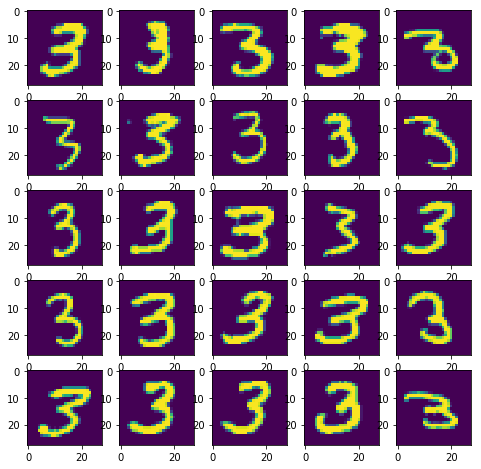

In [60]:
fig,axes=plt.subplots(5,5,figsize=(8,8))

count=0
for axis in axes:
    for ax in axis:
        #reshape
        img=X_aa[count].reshape(28,28)
        ax.imshow(img)
        count+=1

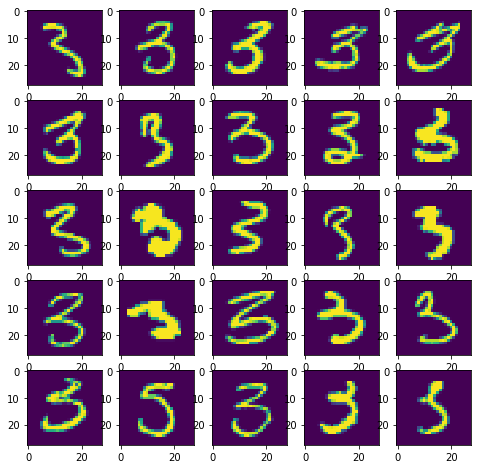

In [61]:
fig,axes=plt.subplots(5,5,figsize=(8,8))

count=0
for axis in axes:
    for ax in axis:
        #reshape
        img=X_ab[count].reshape(28,28)
        ax.imshow(img)
        count+=1

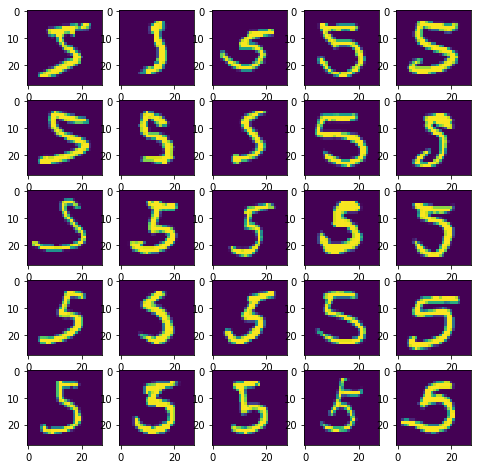

In [62]:
fig,axes=plt.subplots(5,5,figsize=(8,8))

count=0
for axis in axes:
    for ax in axis:
        #reshape
        img=X_ba[count].reshape(28,28)
        ax.imshow(img)
        count+=1

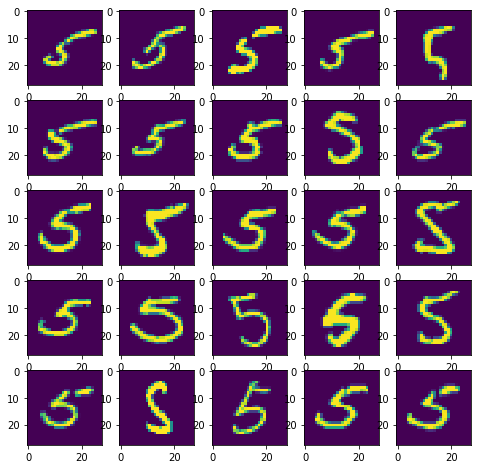

In [63]:
fig,axes=plt.subplots(5,5,figsize=(8,8))

count=0
for axis in axes:
    for ax in axis:
        #reshape
        img=X_bb[count].reshape(28,28)
        ax.imshow(img)
        count+=1

The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on the right show images classified as 5s. Some of the digits that the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so badly written that even a human would have trouble classifying them (e.g., the 5 on the 8th row and 1st column truly looks like a 3). However, most misclassified images seem like obvious errors to us, and it’s hard to understand why the classifier made the mistakes it did.3 The reason is that we used a simple SGDClassifier, which is a linear model. All it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s differ only by a few pixels, this model will easily confuse them. 

The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. In other words, this classifier is quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion would be to preprocess the images to
ensure that they are well centered and not too rotated. This will probably help reduce other errors as well.